Importing Libraries

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [3]:
with open('Social_Network_Ads.csv') as r:
    my_csv=pd.read_csv(r)
x=my_csv.iloc[:,:-1].values
y=my_csv.iloc[:,-1].values

Splitting data into training and test set

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

Building the model (K-NN)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

Comparing prediction and real result

In [7]:
y_pred=classifier.predict(sc.transform(x_test))
print(np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


Confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
cs=confusion_matrix(y_test,y_pred)
print(cs)

[[58  6]
 [ 4 32]]


Evaluating score of model

In [9]:
classifier.score(sc.transform(x_test),y_test)

0.9

Predicting new data

In [1]:
classifier.predict(sc.transform([[30,44000]]))

NameError: name 'classifier' is not defined

In [15]:
x_train

array([[ 1.42857163,  2.12759663],
       [ 2.00229517,  0.38143853],
       [-0.29259901, -0.37522997],
       [ 2.09791577,  1.10900441],
       [-0.86632255, -1.21920638],
       [ 0.6636069 , -1.39382219],
       [-0.48384019, -1.21920638],
       [ 1.04608927,  0.55605434],
       [-0.29259901, -1.30651429],
       [-1.63128728,  0.52695171],
       [ 0.75922749, -1.36471956],
       [ 0.37674513,  0.09041219],
       [ 0.75922749, -0.84087213],
       [-1.4400461 , -1.21920638],
       [ 0.85484808,  1.0216965 ],
       [-0.29259901, -0.8990774 ],
       [-0.19697842,  1.40003076],
       [ 0.85484808, -0.66625632],
       [-0.10135783, -1.07369321],
       [-0.86632255,  2.2731098 ],
       [ 0.37674513, -0.17151153],
       [-1.4400461 , -0.11330626],
       [-0.86632255, -0.78266686],
       [-0.29259901, -0.75356423],
       [-0.19697842,  1.6037492 ],
       [ 0.08988336,  0.03220692],
       [ 1.23733045,  1.86567291],
       [ 0.08988336,  0.14861746],
       [-1.15318433,

Visualising the Training set result

C:\Users\amirmahdi\AppData\Local\Temp\ipykernel_2464\4210541772.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


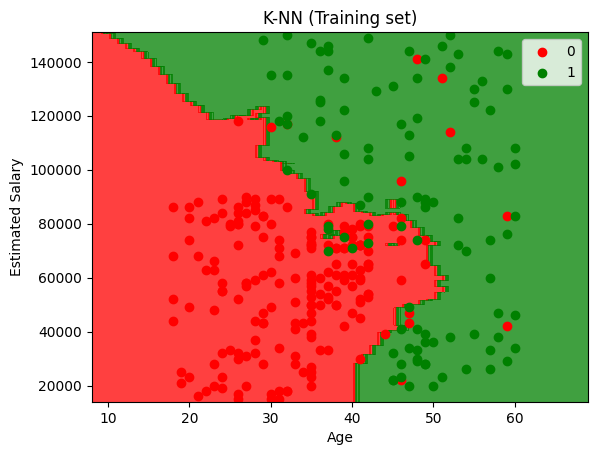

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set result

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
Z.shape
# plt.contourf(X1, X2, Z,
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('K-NN (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

MemoryError: Unable to allocate 15.4 TiB for an array with shape (4604396087, 460) and data type float64